In [1]:
import pandas as pd
import numpy as np

In [6]:
df_low =  pd.read_csv('C:/Users/pjung/OneDrive/문서/정현/동아리/쿠다/TP/저가형(최종).csv')
df_midlow = pd.read_csv('C:/Users/pjung/OneDrive/문서/정현/동아리/쿠다/TP/중저가형(최종).csv')
df_high = pd.read_csv('C:/Users/pjung/OneDrive/문서/정현/동아리/쿠다/TP/고가형(최종).csv')

In [8]:
df_high.info()
df_low.info()
df_midlow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.3  1500 non-null   int64  
 1   Unnamed: 0.2  1500 non-null   float64
 2   Unnamed: 0.1  1500 non-null   float64
 3   Unnamed: 0    1500 non-null   float64
 4   사업장명          1500 non-null   object 
 5   인허가일자         1500 non-null   object 
 6   영업상태명         1500 non-null   object 
 7   폐업일자          562 non-null    object 
 8   지번주소          1500 non-null   object 
 9   도로명주소         1431 non-null   object 
 10  좌표정보(X)       1500 non-null   float64
 11  좌표정보(Y)       1500 non-null   float64
 12  소재지면적         1474 non-null   object 
 13  가격대           1500 non-null   object 
 14  위도            1500 non-null   float64
 15  경도            1500 non-null   float64
 16  지하철역과거리       1500 non-null   float64
 17  주변저가형카페수      1500 non-null   float64
 18  주변중저가형카페수     1500 non-null 

In [17]:
#누락된값 합계
missing_low = df_low.isnull().sum()
print(missing_low[missing_low> 0])

missing_midlow = df_midlow.isnull().sum()
print(missing_midlow[missing_midlow > 0])


missing_high = df_high.isnull().sum()
print(missing_high[missing_high > 0])

폐업일자      1138
소재지면적        1
주변평균월세      27
dtype: int64
폐업일자      433
지번주소        1
도로명주소      15
소재지면적      15
주변평균월세      9
dtype: int64
폐업일자      938
도로명주소      69
소재지면적      26
주변평균월세     21
dtype: int64


In [18]:
#각 커피숍 유형별로 지하철역까지의 거리, 주변 평균 월 임대료 출력

# Combine all dataframes into one for unified analysis
all_coffee_shops = pd.concat([df_high,df_low, df_midlow])

# Select relevant columns
coffee_shop_summary = all_coffee_shops[['사업장명', '영업상태명', '지하철역과거리', '주변평균월세', '가격대']]

# Display data grouped by shop type (price category)
coffee_shop_grouped = coffee_shop_summary.groupby('가격대').agg({
    '사업장명': 'count',
    '지하철역과거리': 'mean',
    '주변평균월세': 'mean'
}).rename(columns={'사업장명': 'Count', '지하철역과거리': 'Average Distance to Subway', '주변평균월세': 'Average Monthly Rent'})

print(coffee_shop_grouped)


     Count  Average Distance to Subway  Average Monthly Rent
가격대                                                         
고가    1500                    0.518966             52.873451
저가    1170                    0.673559             46.099154
중저가    678                    0.661922             46.873659


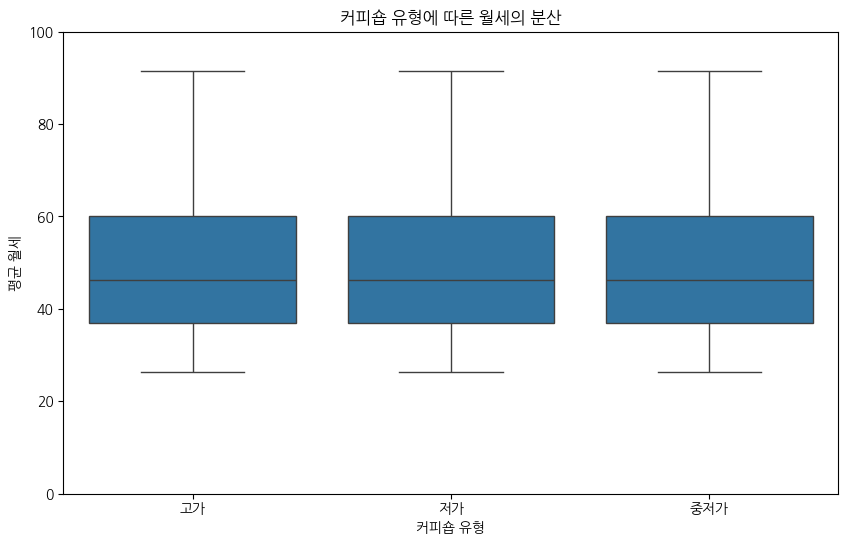

In [25]:
#월 임대료 박스플롯으로 나타내기

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# Set the font to support Korean characters
plt.rc('font', family='NanumGothic')  # Replace with a font that is available on your system

# Reset the index to avoid any duplicate index issues
all_coffee_shops.reset_index(drop=True, inplace=True)

# Check for duplicates in the '가격대' column and remove them
all_coffee_shops = all_coffee_shops.drop_duplicates(subset=['가격대', '주변평균월세'])

# Plot distribution of monthly rental fees by coffee shop type with adjusted y-axis scale
plt.figure(figsize=(10, 6))
sns.boxplot(x='가격대', y='주변평균월세', data=all_coffee_shops)

# Set y-axis limits to make the scale smaller and focus on a specific range
plt.ylim(0, 100)  # Adjust this range based on your data

plt.title('커피숍 유형에 따른 월세 박스플롯')
plt.xlabel('커피숍 유형')
plt.ylabel('평균 월세')
plt.show()


In [26]:
#카페 유형별 영업/폐업 비율

# Calculate the opening and closing ratio
opening_closing_ratio = all_coffee_shops.groupby('가격대')['영업상태명'].value_counts(normalize=True).unstack().fillna(0)
opening_closing_ratio['Open/Closed Ratio'] = opening_closing_ratio.get('영업/정상', 0) / opening_closing_ratio.get('폐업', 1)

print(opening_closing_ratio[['영업/정상', '폐업', 'Open/Closed Ratio']])


영업상태명     영업/정상        폐업  Open/Closed Ratio
가격대                                         
고가     0.907407  0.092593           9.800000
저가     0.962963  0.037037          26.000000
중저가    0.592593  0.407407           1.454545


In [27]:
#카페 유형별 평균 영업일 수

from datetime import datetime

# Convert date columns to datetime
all_coffee_shops['인허가일자'] = pd.to_datetime(all_coffee_shops['인허가일자'], errors='coerce')
all_coffee_shops['폐업일자'] = pd.to_datetime(all_coffee_shops['폐업일자'], errors='coerce')

# Calculate the business period
current_date = datetime.now()
all_coffee_shops['영업기간'] = all_coffee_shops.apply(
    lambda row: (current_date - row['인허가일자']).days if pd.isna(row['폐업일자']) else (row['폐업일자'] - row['인허가일자']).days, axis=1)

# Display average business period by shop type
average_business_period = all_coffee_shops.groupby('가격대')['영업기간'].mean()
print(average_business_period)


가격대
고가     2336.641509
저가      495.941176
중저가    2371.638889
Name: 영업기간, dtype: float64


In [28]:
#소재지 면적에 따른 평균 월세 

# Analyze average rent according to usage area
average_rent_by_area = all_coffee_shops.groupby('소재지면적')['주변평균월세'].mean().reset_index()

print(average_rent_by_area)


     소재지면적     주변평균월세
0     5.46  47.677778
1    16.56  62.022222
2    16.78  63.377778
3     23.0  84.788889
4     27.0  64.444444
..     ...        ...
150   80.0  43.183333
151  83.66  70.855556
152  83.82  84.788889
153  97.02  46.533333
154   97.5  26.588889

[155 rows x 2 columns]


In [34]:
#상관관계 분석
import pandas as pd
from datetime import datetime
import numpy as np

# Convert date columns to datetime format
all_coffee_shops['인허가일자'] = pd.to_datetime(all_coffee_shops['인허가일자'], format='%Y%m%d', errors='coerce')
all_coffee_shops['폐업일자'] = pd.to_datetime(all_coffee_shops['폐업일자'], format='%Y%m%d', errors='coerce')

# Define a function to calculate business days between two dates
def calculate_business_days(row):
    start_date = row['인허가일자']
    if pd.isna(start_date):
        return np.nan  # Return NaN if the start date is missing
    
    if pd.isna(row['폐업일자']):
        # If still open, calculate business days from permit date to today
        end_date = np.datetime64(datetime.now().date())
    else:
        # If closed, calculate business days from permit date to closure date
        end_date = np.datetime64(row['폐업일자'].date())
        
    # Convert start_date to numpy datetime64
    start_date = np.datetime64(start_date.date())
    
    return np.busday_count(start_date, end_date)

# Apply the function to calculate business days and create a new column
all_coffee_shops['영업일수'] = all_coffee_shops.apply(calculate_business_days, axis=1)

# Select only numeric columns for correlation calculation, including the new '영업일수' column
columns_to_exclude = ['좌표정보(X)', '좌표정보(Y)', '위도', '경도'] + [col for col in all_coffee_shops.columns if 'Unnamed' in col]
numeric_cols = all_coffee_shops.drop(columns=columns_to_exclude).select_dtypes(include=['number'])

# Calculate the correlation matrix for the numeric columns only
correlation_matrix = numeric_cols.corr()

# Display the correlation matrix
print(correlation_matrix)


            지하철역과거리  주변저가형카페수  주변중저가형카페수  주변고가형카페수    주변평균월세   주변유동인구수  \
지하철역과거리    1.000000 -0.127626  -0.172206 -0.207424 -0.093087 -0.172378   
주변저가형카페수  -0.127626  1.000000   0.400622  0.204860  0.088656  0.115711   
주변중저가형카페수 -0.172206  0.400622   1.000000  0.391003  0.130406  0.094604   
주변고가형카페수  -0.207424  0.204860   0.391003  1.000000  0.261903  0.232786   
주변평균월세    -0.093087  0.088656   0.130406  0.261903  1.000000  0.068030   
주변유동인구수   -0.172378  0.115711   0.094604  0.232786  0.068030  1.000000   
영업일수      -0.055204  0.171008  -0.032804 -0.143369  0.010947  0.011725   

               영업일수  
지하철역과거리   -0.055204  
주변저가형카페수   0.171008  
주변중저가형카페수 -0.032804  
주변고가형카페수  -0.143369  
주변평균월세     0.010947  
주변유동인구수    0.011725  
영업일수       1.000000  
